In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import sys

OUTPUT_TEMPLATE = (
    '"Did more/less users use the search feature?" p-value:  {more_users_p:.3g}\n'
    '"Did users search more/less?" p-value:  {more_searches_p:.3g} \n'
    '"Did more/less instructors use the search feature?" p-value:  {more_instr_p:.3g}\n'
    '"Did instructors search more/less?" p-value:  {more_instr_searches_p:.3g}'
)

searchdata_file = 'searches.json'


df = pd.read_json(searchdata_file, orient='records', lines=True)

new_users = df[df['uid']%2==1]
old_users = df[df['uid']%2==0]

new_searches = new_users[new_users['search_count']>0]
old_searches = old_users[old_users['search_count']>0]

new_zero = new_users[new_users['search_count']==0]
old_zero = old_users[old_users['search_count']==0]

contingency = [[len(new_searches.index), len(new_zero.index)],
               [len(old_searches.index), len(old_zero.index)]]
chi2, p, dof, expected = stats.chi2_contingency(contingency)
p
stats.mannwhitneyu(new_users.search_count, old_users.search_count).pvalue

0.07059103623543486

(array([70., 20., 15.,  8.,  1.,  2.,  0.,  0.,  3.,  1.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

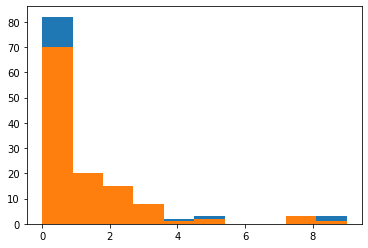

In [200]:
new_instructors = new_users[new_users['is_instructor']==True]
old_instructors = old_users[old_users['is_instructor']==True]

new_instructor_searches = new_instructors[new_instructors['search_count']>0]
old_instructor_searches = old_instructors[old_instructors['search_count']>0]

new_instructor_zero = new_instructors[new_instructors['search_count']==0]
old_instructor_zero = old_instructors[old_instructors['search_count']==0]
contingency2 = [[len(new_instructor_searches.index), len(new_instructor_zero.index)],
                [len(old_instructor_searches.index), len(old_instructor_zero.index)]]
chi3, p2, dof2, expected2 = stats.chi2_contingency(contingency2)
p2
stats.mannwhitneyu(new_instructors.search_count, old_instructors.search_count).pvalue
plt.hist(new_instructors.search_count)
plt.hist(old_instructors.search_count)